In [1]:
import pandas as pd
import numpy as np
from data import CleanedData
from models import nn
import sklearn.metrics
import torch

In [2]:
data = CleanedData(loc='./data/joined.csv', test_ratio=0.2, impute_data=True, convert_non_numerical=True, normalize_data=True, drop_columns=['source', 'Last_Update','province','country','latitude', 'longitude'])

/opt/miniconda3/envs/cmpt353/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [3]:
X_train, y_train = data.training_data
X_test, y_test = data.test_data

In [4]:
X_train.head(5)

,age,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio,confirmed_day,in_contact,transformed_Combined_Key,transformed_sex
79833,47.000000,51.433200,7.661600,11.077393,7.519692,10.977192,8.371936,5.888185,2.850430,120.0,0.0,317.0,0.0
27605,40.319493,20.505428,84.418059,12.051411,6.525030,11.831866,10.407047,5.912468,0.398037,148.0,0.0,330.0,2.0
262450,42.780189,19.449759,76.108221,13.970372,10.366939,13.634507,12.615772,6.854431,2.723007,135.0,0.0,252.0,2.0
426032,40.490279,19.449759,76.108221,13.970372,10.366939,13.634507,12.615772,6.854431,2.723007,125.0,0.0,252.0,2.0
308058,72.000000,20.091100,-98.762400,9.386812,7.524561,9.156729,6.395262,5.957217,15.532272,101.0,0.0,180.0,1.0


In [5]:
# Loading up the neural netowrk models

model_1 = nn.network_1()
model_2 = nn.network_1()
model_3 = nn.network_2()
model_4 = nn.network_2()

nn.load_model(model_1, './model_1.pth')
nn.load_model(model_2, './model_2.pth')
nn.load_model(model_3, './model_3.pth')
nn.load_model(model_4, './model_4.pth')

In [6]:
print(f'training accuracy of model_1: {nn.eval(model_1, X_train, y_train):.2f}%')
print(f'validation accuracy of model_1: {nn.eval(model_1, X_test, y_test):.2f}%')
print(f'training accuracy of model_2: {nn.eval(model_2, X_train, y_train):.2f}%')
print(f'validation accuracy of model_2: {nn.eval(model_2, X_test, y_test):.2f}%')
print(f'training accuracy of model_3: {nn.eval(model_3, X_train, y_train):.2f}%')
print(f'validation accuracy of model_3: {nn.eval(model_3, X_test, y_test):.2f}%')
print(f'training accuracy of model_4: {nn.eval(model_4, X_train, y_train):.2f}%')
print(f'validation accuracy of model_4: {nn.eval(model_4, X_test, y_test):.2f}%')

training accuracy of model_1: 95.15%
validation accuracy of model_1: 95.25%
training accuracy of model_2: 95.67%
validation accuracy of model_2: 95.68%
training accuracy of model_3: 94.16%
validation accuracy of model_3: 94.20%
training accuracy of model_4: 98.00%
validation accuracy of model_4: 98.01%


In [7]:
model_1_y_ = torch.argmax(torch.softmax(model_1(torch.tensor(X_train.values).float()), dim=1), dim=1)
model_2_y_ = torch.argmax(torch.softmax(model_2(torch.tensor(X_train.values).float()), dim=1), dim=1)
model_3_y_ = torch.argmax(torch.softmax(model_3(torch.tensor(X_train.values).float()), dim=1), dim=1)
model_4_y_ = torch.argmax(torch.softmax(model_4(torch.tensor(X_train.values).float()), dim=1), dim=1)

In [8]:
data.encoder.classes_.tolist()

['deceased', 'hospitalized', 'nonhospitalized', 'recovered']

In [9]:
conf_matrix_1 = sklearn.metrics.confusion_matrix(y_train.values, model_1_y_)
conf_matrix_2 = sklearn.metrics.confusion_matrix(y_train.values, model_2_y_)
conf_matrix_3 = sklearn.metrics.confusion_matrix(y_train.values, model_3_y_)
conf_matrix_4 = sklearn.metrics.confusion_matrix(y_train.values, model_4_y_)

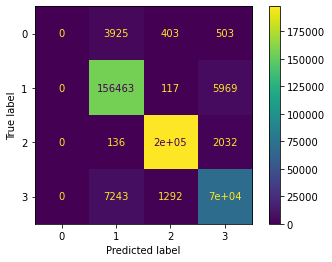

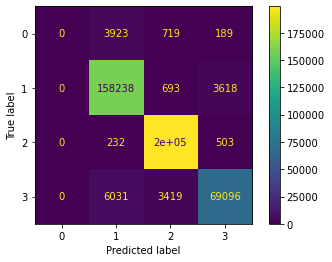

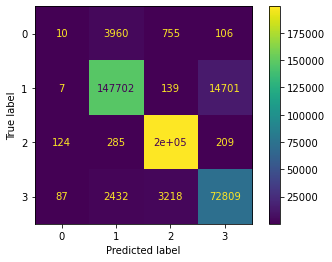

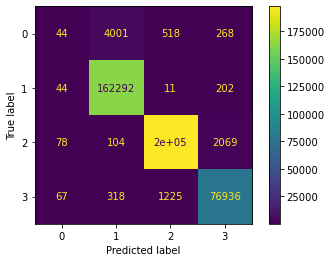

In [10]:
sklearn.metrics.ConfusionMatrixDisplay(conf_matrix_1).plot()
sklearn.metrics.ConfusionMatrixDisplay(conf_matrix_2).plot()
sklearn.metrics.ConfusionMatrixDisplay(conf_matrix_3).plot()
sklearn.metrics.ConfusionMatrixDisplay(conf_matrix_4).plot()